## Phương pháp Euler 

Giải phương trình vi phân 

$$ \frac{du}{dt} = f(u,t) $$

Vế phải là hàm $f$ cho trước. Bài toán đặt ra là xác định hàm (chẳng qua là tính các giá trị của $u$ tại các điểm $t \ge t_0$. Biết điều kiện đầu $u = u_0$ tại $t_0$.

In [39]:
function euler(f::Function, u₀::Number, t₀::Number, Δt::Number, NT::Number)
    u = u₀
    t = t₀
    T = zeros(NT, 1)
    U = zeros(NT, 1)
    for n = 1:NT
        u += Δt * f(u, t)
        U[n] = u   # bổ sung giá trị mới tính được vào vec-tơ kết quả 
        # println(t, " ", u)
        t += Δt  # chuyển đến bước thời gian tiếp theo 
        T[n] = t
    end
    return T, U
end 

euler (generic function with 1 method)

Ở hàm trên ta bố trí tính toán tại `NT` điểm nút lưới. Các điểm nút lưới này cách nhau `Δt` và bắt đầu tại `t₀`.
Ta tính toán theo phương pháp số trị chứ không phải là tính tích phân bằng giải tích, bởi vậy "sản phẩm" không phải là hàm $u$ mà là một vec-tơ `U` = [u1, u2, ..., u<sub>NT</sub>]. Kèm với đó là vec-tơ thời gian `T`, để sau này tiện vẽ đồ thị so sánh trong cách trường hợp lấy những bước thời gian khác nhau.

Trong Julia, một cách khởi tạo vec-tơ là dùng hàm `zeros`. Hàm này nhận hai tham số là số phần tử theo chiều thứ nhất và số phần tử theo chiều thứ hai. Ở đây tham số thứ hai ta cho bằng 1, nhằm thể hiện rằng ta đang tạo ra `U` là một vec-tơ chứ không phải là ma trận. 

Trong bài học này, ta quy ước kí hiệu chữ in như `U` là vec-tơ hoặc ma trận, còn chữ thường như `t` chỉ là một trị số vô hướng.

Câu lệnh `u += Δt * f(u, t)` tức là "thêm vào `u` một lượng `Δt * f(u, t)`; và do đó đồng nghĩa với `u = u + Δt * f(u, t)`.

Lệnh này thể hiện sơ đồ sai phân Euler tiến: $u^{n+1} = u^n + f(u^n, t^n)$. Trong đó hệ số ${}^{n+1}$ là để chỉ bước thời gian kế tiếp, còn hệ số $^n$ là "hiện tại".

Trong mã lệnh trên, dấu `#` dùng để viết những chú thích trong Julia. Những gì từ dấu `#` trở về cuối dòng, máy tính sẽ bỏ qua không thực hiện. Do vậy, dòng lệnh `println` đánh dấu `#` ở đầu bị vô hiệu hóa. Bởi vì đầu ra của hàm là vec-tơ `U` chứa đầy đủ các giá trị `u` ở từng bước nên lệnh in (`println`) là không cần thiết. Dùng véc-tơ cũng hữu ích để vẽ đồ thị hàm số (như phần sau này).

## Kiểm tra 

Bây giờ ta kiểm tra trường hợp: 

$ f = au $ với $u_0 = 1$ tại $t = 0$;

Nghiệm giải tích là $ u = u_0 \exp(at) $. 
Với *a* = 1, ta tính được:

In [40]:
f₁ = function(u,t) return 1*u end
T₁, U₁ = euler(f₁, 1, 0, 0.1, 20);
T₁', U₁' # hiển thị dưới dạng chuyển vị cột thành hàng cho dễ xem 

(
1x20 Array{Float64,2}:
 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  …  1.4  1.5  1.6  1.7  1.8  1.9  2.0,

1x20 Array{Float64,2}:
 1.1  1.21  1.331  1.4641  1.61051  …  5.05447  5.55992  6.11591  6.7275)

Tương tự, với *a* = -1:

In [41]:
f₁ = function(u,t) return -1*u end
T₁, U₁ = euler(f₁, 1, 0, 0.1, 20);
T₁', U₁' # hiển thị dưới dạng chuyển vị cột thành hàng cho dễ xem 

(
1x20 Array{Float64,2}:
 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  …  1.4  1.5  1.6  1.7  1.8  1.9  2.0,

1x20 Array{Float64,2}:
 0.9  0.81  0.729  0.6561  0.59049  0.531441  …  0.150095  0.135085  0.121577)

Với trường hợp *a* = -1 này, ta hãy so sánh với nghiệm giải tích: $u = u_0\exp(at)$ hay $u = \exp(-t)$.

Trong đoạn mã lệnh dưới đây, ta dùng thư viện đồ thị `PyPlot` và chỉ định vẽ hai đồ thị bằng các lệnh `plot`. Lưu ý rằng vec tơ nghiệm giải tích dễ dàng được tính ra từ vec tơ thời gian bàng phép toán.

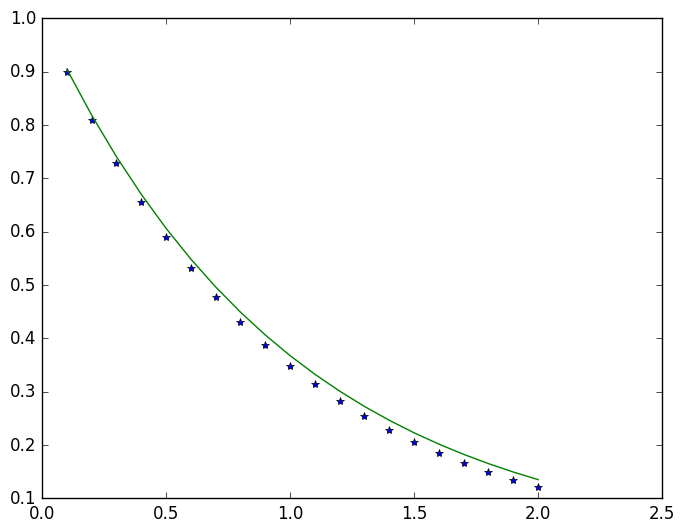

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdbf5393450>

In [42]:
using PyPlot 

plot(T₁, U₁, linewidth=0, marker="*")   # nghiệm số trị, biểu diễn bởi các dấu sao 
plot(T₁, 1*exp(-1*T₁))          # nghiệm giải tích, đường liền nét 

Rõ ràng phép xấp xỉ không được chính xác lắm, đặc biệt khi *t* tăng. Tuy nhiên, sẽ còn tệ hơn nữa khi ta nới rộng bước tính (tăng Δt). 

Trong tập bài giảng, ta đã biết để sai phân dạng PT này ổn định cần có |G| < 1, trong đó G là hệ số khuếch đại. 

Với điều kiện Δt < -2/a và a = -1 < 0 thì Δt < 2. Hãy xét các trường hợp Δt = 0.5, 1, 2 và xét động thái của nghiệm số trị như thế nào.

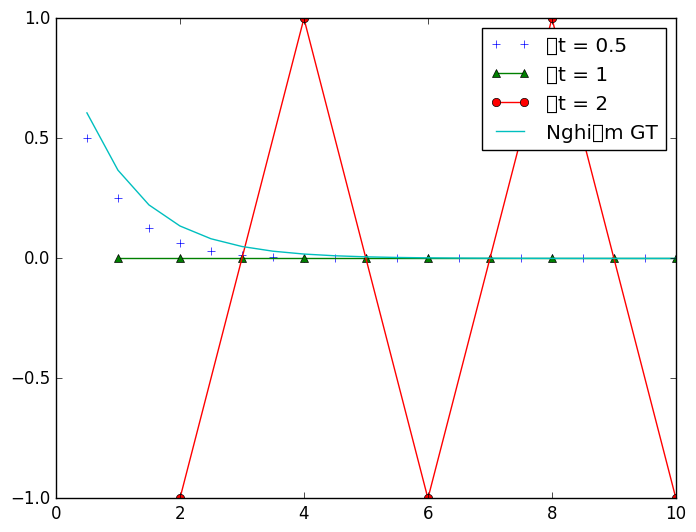

PyObject <matplotlib.legend.Legend object at 0x7fdbf4f6cfd0>

In [51]:
T₁₁, U₁₁ = euler(f₁, 1, 0, 0.5, 20);
T₁₁₁, U₁₁₁ = euler(f₁, 1, 0, 1.0, 10);
T₁₁₁₁, U₁₁₁₁ = euler(f₁, 1, 0, 2.0, 5);

plot(T₁₁, U₁₁, linewidth=0, marker="+", label="Δt = 0.5")
plot(T₁₁₁, U₁₁₁, marker="^", label="Δt = 1")
plot(T₁₁₁₁, U₁₁₁₁, marker="o", label="Δt = 2")
plot(T₁₁, 1*exp(-1*T₁₁), label="Nghiệm GT")
legend(loc="best")

Sự bất ổn định xảy ra khi Δt = 2. Ngay cả khi Δt = 1, nghiệm số đã sai hoàn toàn (nhưng chưa đến mức bất ổn định).


## Luyện tập 

Hãy dùng phương pháp Euler để giải PT vi phân: 

$$ \frac{du}{dt} = f(u,t) $$

với hàm f là đa thức: $ f = -2t^3 + 12t^2 - 20t + 8.5 $ với $ u_0 = 1 $ tại $t = 0$.

Lần này f = f(t) và không phụ thuộc u.

Hãy hoàn thành mã lệnh để tính toán và vẽ biểu đồ nghiệm:

In [ ]:
f₂ = function(u,t) return  ...  end
T₂, U₂ = euler(f₂, 1, 0, 0.1, 40);
T₂', U₂' 

So sánh nghiệm số trị với nghiệm giải tích: $u = -0.5t^4 + 4t^3 - 10t^2 + 8.5t + 1$.

In [ ]:
using PyPlot 

plot(T₂, U₂, linewidth=0, marker="*")   # nghiệm số trị, biểu diễn bởi các dấu sao 
plot(T₂, 1*exp(-1*T₁))          # nghiệm giải tích, đường liền nét 